In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [61]:
guns15_17 = pd.read_csv("Cleaned-gun-deaths.csv", low_memory=False)

In [62]:
guns15_17.head()

,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide
2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,Assault (homicide)
4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide


In [63]:
guns15_17['Causes_of_Death'] = guns15_17['Causes_of_Death'].str.lower()

In [64]:
guns15_17.count()

Unnamed: 0                115065
Resident_Status           115065
Month_Of_Death            115065
Sex                       115065
Age                       115065
Age_Group                 115065
Place_Of_Death            115065
Marital_Status            115065
DOW_of_Death              115065
Data_Year                 115065
Injured_At_Work           115065
Manner_Of_Death           115065
Activity_Code             115065
Place_Of_Causal_Injury    115065
Race                      115065
Hispanic_Origin           115065
Causes_of_Death           115065
ICD10                     115065
dtype: int64

In [65]:
guns15_17byrace = guns15_17.groupby(['Race'])

In [66]:
totalbyrace = guns15_17byrace['Race'].count()
totalbyrace

Race
American Indian               1271
Asian Indian                   226
Asian or Pacific Islander      618
Black                        29522
Chinese                        198
Filipino                       213
Guamanian                       20
Hawaiian                        27
Japanese                        73
Korean                         144
Samoan                          42
Vietnamese                     212
White                        82499
Name: Race, dtype: int64

In [67]:
guns15_17bypa = guns15_17byrace["Causes_of_Death"].value_counts()

In [68]:
guns15_17bypa

Race                       Causes_of_Death                            
American Indian            suicide by firearms                              677
                           assault (homicide) by discharge of firearms      475
                           legal intervention                                58
                           accidental discharge of firearms                  34
                           discharge of firearms                             27
Asian Indian               suicide by firearms                              123
                           assault (homicide) by discharge of firearms       99
                           discharge of firearms                              2
                           accidental discharge of firearms                   1
                           legal intervention                                 1
Asian or Pacific Islander  suicide by firearms                              322
                           assault (homicide) by 

In [44]:
guns15_17byLI = guns15_17.loc[guns15_17['Causes_of_Death']=="legal intervention"]

In [45]:
guns15_17byLI


,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,2015,N,Homicide,Unknown,Unknown,American Indian,Non - Hispanic other races,legal intervention,legal intervention
142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
823,823,Residents,September,M,57,55 - 64,Unknown,M,Friday,2015,N,Homicide,Other Activity,Street and Highway,White,Non - Hispanic white,legal intervention,legal intervention
1402,1402,Residents,July,M,49,45 - 54,Decendents Home,D,Tuesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1616,1616,Residents,May,M,42,35 - 44,Outpatient Hospital,M,Friday,2015,Y,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1714,1714,Intra_state_NR,January,M,29,25 - 34,Outpatient Hospital,M,Tuesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1745,1745,Residents,February,M,55,55 - 64,Other,M,Monday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention


In [46]:
 guns15_17byLIbyrace= guns15_17byLI.groupby(['Race'])

In [52]:
racecount = guns15_17byLIbyrace['Race'].count()

In [48]:
guns15_17byLIbyrace.head(50)

,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
129,129,Residents,September,M,33,25 - 34,Other,S,Wednesday,2015,N,Homicide,Unknown,Unknown,American Indian,Non - Hispanic other races,legal intervention,legal intervention
142,142,Residents,October,M,49,45 - 54,Other,D,Saturday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
279,279,Residents,February,M,46,45 - 54,Other,S,Wednesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
628,628,Intra_state_NR,June,F,40,35 - 44,Other,M,Wednesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
770,770,Intra_state_NR,August,M,36,35 - 44,Other,S,Sunday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
823,823,Residents,September,M,57,55 - 64,Unknown,M,Friday,2015,N,Homicide,Other Activity,Street and Highway,White,Non - Hispanic white,legal intervention,legal intervention
1402,1402,Residents,July,M,49,45 - 54,Decendents Home,D,Tuesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1616,1616,Residents,May,M,42,35 - 44,Outpatient Hospital,M,Friday,2015,Y,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1714,1714,Intra_state_NR,January,M,29,25 - 34,Outpatient Hospital,M,Tuesday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention
1745,1745,Residents,February,M,55,55 - 64,Other,M,Monday,2015,N,Homicide,Unknown,Unknown,White,Non - Hispanic white,legal intervention,legal intervention


In [49]:
guns15_17LIbypa = guns15_17byLIbyrace["Causes_of_Death"].value_counts()

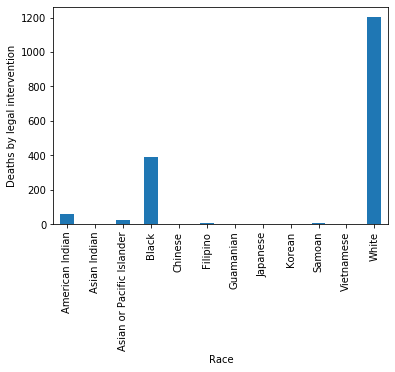

<Figure size 432x288 with 0 Axes>

In [73]:
lichart = racecount.plot(kind='bar')
#totalchart = totalbyrace.plot(kind='bar')
lichart.set_xlabel("Race")
lichart.set_ylabel("Deaths by legal intervention")
plt.show()
plt.tight_layout()